# WeatherPy
----

In [ ]:
# Observable trends
# There is a linear trend between temperature and latitude.
# There is no observable trend between latitude and humidity, cloudiness, and wind speed.
# There is a strong negative linear correlation between increasing latitude and temperature in the northern hemisphere. As locations closer to 0 latitude are closest to the equator.
# There is a strong positive linear correlation between increasing latitude and temperature in the southern hemisphere. As locations closer to 0 latitude are closest to the equator.
# There is no linear correlation between latitude and humidity, cloudiness, and wind speed in the northern and southern hemisphere.

In [5]:
# import dependencies
import pandas as pd
from numpy import random 
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
from pprint import pprint
from config import weather_api_key
import json

## Generate Cities List

In [6]:
# generate 1500 random floats between world latitude and longitude coordinates
rand_lat_gen = random.uniform(-90,91,1500)
rand_lon_gen = random.uniform(-180,181,1500)

# create a dataframe from random coordinates
city_corr = {"rand_lat": rand_lat_gen,
            "rand_lon": rand_lon_gen}

city_corr = pd.DataFrame(city_corr)

# create empty city and country lists
city_list = []
country_list = []

# loop through random coordinate pairs and find the closest city
for i in city_corr.index:
    latitude = city_corr.iloc[int(i),0]
    longitude = city_corr.iloc[int(i),1]
    location = citipy.nearest_city(latitude,longitude)
    city = location.city_name
    ctry = location.country_code
    city_list.append(city)
    country_list.append(ctry)

# create city and country columns in the random coordinates list using city_list and country_list
city_corr['City'] = city_list
city_corr['Country'] = country_list

# drop all duplicate cities
city_corr = city_corr.drop_duplicates(subset=['City','Country'], keep='first', inplace=False)
city_corr = city_corr.reset_index(drop=True)
city_corr.head()

,rand_lat,rand_lon,City,Country
0,-24.084345,-68.140025,calama,cl
1,-66.861468,135.567181,new norfolk,au
2,-49.896689,-132.850029,rikitea,pf
3,15.824268,51.834423,salalah,om
4,62.805359,114.955560,almaznyy,ru


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# create empty lists
city_lats = []
city_lons = []
city_names = []
cloudss = []
countrys = []
dates = []
humiditys = []
max_temps = []
wind_speeds = []

# loop through the city and countries and find the weather data

for i in city_corr.index:
    city_name = city_corr.iloc[int(i),2]
    country_code = city_corr.iloc[int(i),3]
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={weather_api_key}&cnt=1&units=imperial"
    cities = requests.get(url).json()
    
    try:
        city_lat = cities['coord']['lat']
        city_lon = cities['coord']['lon']
        city_name = cities['name']
        clouds = cities['clouds']['all']
        country = cities['sys']['country']
        date = cities['dt']
        humidity = cities['main']['humidity']
        max_temp = cities['main']['temp_max']
        wind_speed = cities['wind']['speed']
        
        city_lats.append(city_lat)
        city_lons.append(city_lon)
        city_names.append(city_name)
        cloudss.append(clouds)
        countrys.append(country)
        dates.append(date)
        humiditys.append(humidity)
        max_temps.append(max_temp)
        wind_speeds.append(wind_speed)
        
        print(f"Data found: {city_name}, {country_code}")
    
    except KeyError as e:
        print(f'{city_name} not found')
    


Data found: Calama, cl
Data found: New Norfolk, au
Data found: Rikitea, pf
Data found: Salalah, om
Data found: Almaznyy, ru
Data found: Ishigaki, jp
Data found: Busselton, au
Data found: Arlit, ne
Data found: Carnarvon, au
Data found: Avarua, ck
Data found: Husavik, is
Data found: Shinshiro, jp
illoqqortoormiut not found
Data found: Sitka, us
Data found: Souillac, mu
Data found: Joshīmath, in
barentsburg not found
Data found: Pisco, pe
Data found: Ancud, cl
Data found: Barrow, us
Data found: Nikolskoye, ru
Data found: Butaritari, ki
Data found: Ushuaia, ar
Data found: Hermanus, za
Data found: Hilo, us
Data found: Tripoli, ly
Data found: New Haven, us
Data found: Faanui, pf
Data found: Yellowknife, ca
Data found: Kruisfontein, za
Data found: Gao, ml
Data found: Northam, au
Data found: San Quintín, mx
Data found: Tura, ru
Data found: Ponta do Sol, cv
mataura not found
saleaula not found
Data found: Saint-Philippe, re
Data found: Albany, au
tsihombe not found
Data found: Ylivieska, fi
Dat

Data found: Agogo, gh
Data found: Otane, nz
Data found: Whitehorse, ca
Data found: Kenai, us
Data found: Turochak, ru
Data found: Plettenberg Bay, za
Data found: Sandy Bay, hn
amderma not found
Data found: Mahibadhoo, mv
Data found: Tuatapere, nz
Data found: Petropavlovsk-Kamchatskiy, ru
Data found: Sawākin, sd
Data found: Dinghaicun, cn
Data found: Te Anau, nz
Data found: Westport, ie
Data found: Apucarana, br
Data found: Bela, pk
Data found: Wa, gh
Data found: Oktyabr'skoye, ru
Data found: Poltava, ua
Data found: Rio Grande, br
Data found: Kem', ru
Data found: Tupi Paulista, br
Data found: Acaraú, br
Data found: Sarakhs, ir
Data found: Cherskiy, ru
Data found: Ossora, ru
Data found: Mindelo, cv
Data found: San Patricio, mx
mahadday weyne not found
Data found: Pāveh, ir
Data found: Stornoway, gb
Data found: Roald, no
Data found: São Filipe, cv
tubruq not found
Data found: Réo, bf
Data found: Shaowu, cn
Data found: Grand Gaube, mu
Data found: Saskylakh, ru
Data found: Ahipara, nz
Data 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a dataframe summarizing the city weather

city_weather = {
    'City': city_names,
    'Country': countrys,
    'City_Latitude': city_lats,
    'City_Longitude': city_lons,
    'Date': dates,
    'Cloudiness': cloudss,
    'Humidity': humiditys,
    'Max Temp': max_temps,
    'Wind Speed': wind_speeds}

city_weather = pd.DataFrame(city_weather)

# export the dataframe as a csv file
city_weather.to_csv("output_data/city_weather.csv", index=False, header=True)
print(f"{city_weather['City'].count()} cities found")
city_weather.head()

552 cities found


,City,Country,City_Latitude,City_Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Calama,CL,-22.4667,-68.9333,1622219741,40,41,61.29,1.14
1,New Norfolk,AU,-42.7826,147.0587,1622219745,19,66,45.90,1.01
2,Rikitea,PF,-23.1203,-134.9692,1622219699,69,71,73.96,17.11
3,Salalah,OM,17.0151,54.0924,1622219664,20,84,86.09,5.75
4,Almaznyy,RU,48.0448,40.0450,1622219939,55,72,71.74,8.19


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

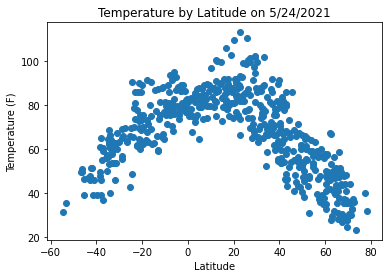

Comparing temperature by latitude on 5/24/2021. Follows a linear trend


In [9]:
# create a scatter plot from the latitude and temperatures
Latitude = city_weather['City_Latitude']
Temperature = city_weather['Max Temp']
plt.scatter(Latitude, Temperature)

# format the axes of the plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')
plt.show()
print('Comparing temperature by latitude on 5/24/2021. Follows a linear trend')

## Latitude vs. Humidity Plot

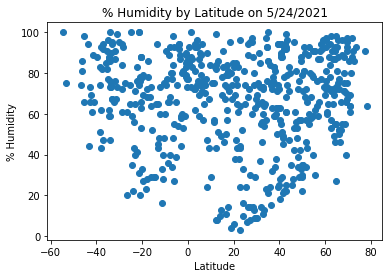

Comparing % humidity by latitude on 5/24/2021. There is no obvious trend


In [10]:
# create a scatter plot from the latitude and humidity
Latitude = city_weather['City_Latitude']
Humidity = city_weather['Humidity']
plt.scatter(Latitude, Humidity)

# format the axes of the plot
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')
plt.show()

print('Comparing % humidity by latitude on 5/24/2021. There is no obvious trend')

## Latitude vs. Cloudiness Plot

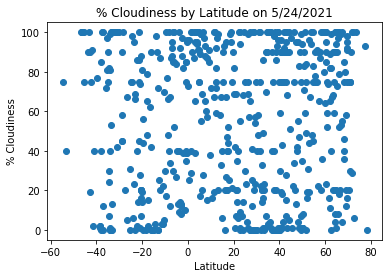

Comparing % cloudiness by latitude on 5/24/2021. There is no obvious trend


In [11]:
# create a scatter plot from the latitude and cloudiness
Latitude = city_weather['City_Latitude']
Cloudiness = city_weather['Cloudiness']
plt.scatter(Latitude, Cloudiness)

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')
plt.show()

print('Comparing % cloudiness by latitude on 5/24/2021. There is no obvious trend')

## Latitude vs. Wind Speed Plot

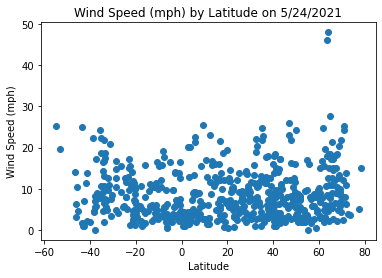

Comparing windspeed by latitude on 5/24/2021. There is no obvious trend


In [12]:
# create a scatter plot from the latitude and windspeed
Latitude = city_weather['City_Latitude']
Wind = city_weather['Wind Speed']
plt.scatter(Latitude, Wind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')
plt.show()

print('Comparing windspeed by latitude on 5/24/2021. There is no obvious trend')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong negative linear correlation between temperature and increasing latitude


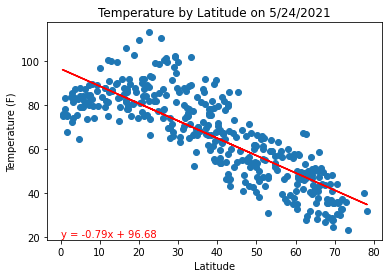

In [13]:
# create a subset of data for the north hemisphere
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]

# create a scatter plot from the latitude and temperature
Latitude = n_hemisphere['City_Latitude']
Temperature = n_hemisphere['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')

# plot a trendline on the graph
x_values = Latitude
y_values = Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=10,color="red")

print('There is a strong negative linear correlation between temperature and increasing latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong positive linear correlation between temperature and increasing latitude


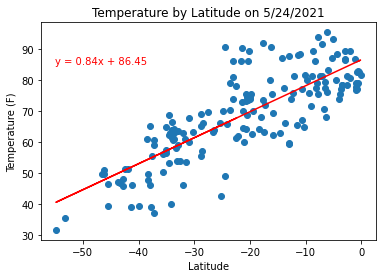

In [14]:
# create a subset of data for the southern hemisphere
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]

# identify data for the latitude and temperature plot
Latitude = s_hemisphere['City_Latitude']
Temperature = s_hemisphere['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=10,color="red")

print('There is a strong positive linear correlation between temperature and increasing latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is no correlation between humidity and increasing latitude


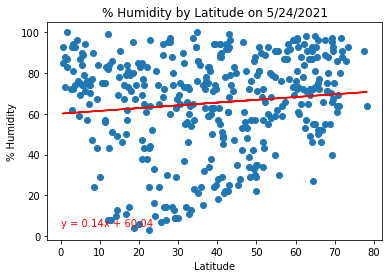

In [15]:
# create a subset of data for the northern hemisphere
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]

# identify data for the latitude and humidity plot
Latitude = n_hemisphere['City_Latitude']
Humidity = n_hemisphere['Humidity']

plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=10,color="red")

print('There is no correlation between humidity and increasing latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is no correlation between humidity and decreasing latitude


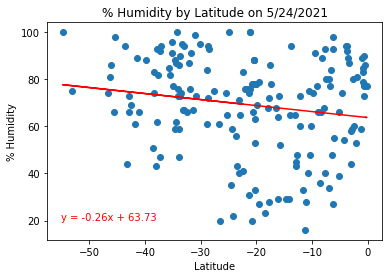

In [16]:
# create a subset of data for the northern hemisphere
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]

# identify data for the latitude and humidity plot
Latitude = s_hemisphere['City_Latitude']
Humidity = s_hemisphere['Humidity']

plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")

print('There is no correlation between humidity and decreasing latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no correlation between cloudiness and increasing latitude


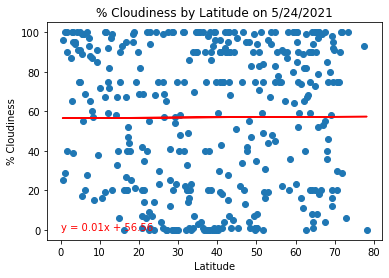

In [17]:
# create a subset of data for the northern hemisphere
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]

# identify data for the latitude and cloudiness plot
Latitude = n_hemisphere['City_Latitude']
Cloudiness = n_hemisphere['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=10,color="red")

print('There is no correlation between cloudiness and increasing latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no correlation between cloudiness and decreasing latitude


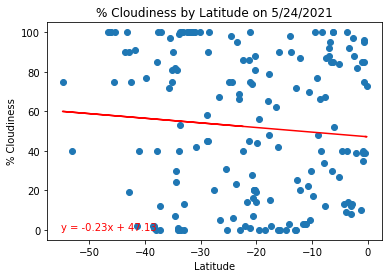

In [18]:
# create a subset of data for the southern hemisphere
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]

# identify data for the latitude and cloudiness plot
Latitude = s_hemisphere['City_Latitude']
Cloudiness = s_hemisphere['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=10,color="red")

print('There is no correlation between cloudiness and decreasing latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between wind speed and increasing latitude


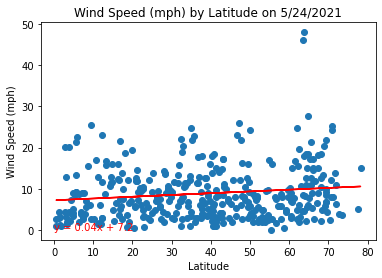

In [19]:
# create a subset of data for the northern hemisphere
n_hemisphere = city_weather[city_weather['City_Latitude'] >= 0]

# identify data for the latitude and wind speed plot
Latitude = n_hemisphere['City_Latitude']
Wind = n_hemisphere['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=10,color="red")

print('There is no correlation between wind speed and increasing latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no correlation between wind speed and decreasing latitude


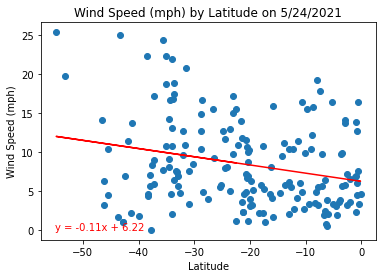

In [20]:
# create a subset of data for the southern hemisphere
s_hemisphere = city_weather[city_weather['City_Latitude'] < 0]

# identify data for the latitude and wind speed plot
Latitude = s_hemisphere['City_Latitude']
Wind = s_hemisphere['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) by Latitude on 5/24/2021')

# Plot the trendline
x_values = Latitude
y_values = Wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=10,color="red")

print('There is no correlation between wind speed and decreasing latitude')